In [1]:
import gpflow as gp
import numpy as np
import pandas as pd
from gpflow.utilities import print_summary
import matplotlib.pyplot as plt
import random
import tensorflow as tf

In [2]:
data = pd.read_csv('lda.csv')

In [3]:
random.seed(0)
sample_index = random.sample(range(len(data)),32)

In [4]:
print(sample_index)

[197, 215, 20, 132, 261, 248, 207, 155, 244, 183, 111, 258, 71, 144, 48, 128, 272, 75, 158, 50, 37, 169, 241, 286, 51, 181, 222, 161, 104, 282, 226, 266]


In [43]:
X = np.array([data.values[i,:3] for i in sample_index])
y = np.array([data.values[i,3] for i in sample_index]).reshape(32,1)
print(y)

[[1270.]
 [1440.]
 [2800.]
 [1310.]
 [3480.]
 [1630.]
 [1300.]
 [2240.]
 [1380.]
 [1620.]
 [2010.]
 [1690.]
 [1570.]
 [2090.]
 [3050.]
 [1650.]
 [1940.]
 [1710.]
 [1300.]
 [1290.]
 [2600.]
 [1350.]
 [2350.]
 [1750.]
 [1720.]
 [1590.]
 [2710.]
 [3620.]
 [1270.]
 [1290.]
 [1840.]
 [1970.]]


In [61]:
c = np.linspace(1000,1500,100)
model_evidence = []
k = gp.kernels.SquaredExponential()
def objective_closure():
     return tf.subtract(tf.constant(3*np.log(32)), tf.math.scalar_mul(2,m1.log_marginal_likelihood()))
     #return -tf.math.scalar_mul(2,m1.log_marginal_likelihood())
for i in c:
    mean = gp.mean_functions.Constant(i)
    m1 = gp.models.GPR(data=(X,y), kernel = k, mean_function=mean, noise_variance=0.001)
    opt = gp.optimizers.Scipy()
    opt_logs = opt.minimize(objective_closure,
                            m1.trainable_variables,
                            options=dict(maxiter=100))
    model_evidence.append(m1.log_marginal_likelihood())

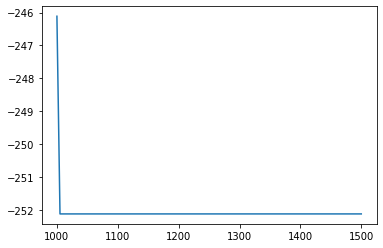

In [62]:
plt.plot(c, model_evidence)

In [67]:
y_log = np.log(y)
kernel_list = [gp.kernels.SquaredExponential(), 
               gp.kernels.Matern32(),
               gp.kernels.Matern52(),
               gp.kernels.RationalQuadratic(),
               gp.kernels.ArcCosine()]
mean_list = [gp.mean_functions.Zero(),
        gp.mean_functions.Constant()]
model_evidence_search = []
def objective_closure_bic():
    return tf.constant(3*np.log(32))- 2*m1.log_marginal_likelihood()
for i in kernel_list:
    for j in mean_list:
        print(i)
        m1 = gp.models.GPR(data=(X,y_log), kernel = i, mean_function=j, noise_variance=0.001)
        opt = gp.optimizers.Scipy()
        opt_logs = opt.minimize(objective_closure_bic,
                                m1.trainable_variables,
                                options=dict(maxiter=100))
        model_evidence_search.append(objective_closure_bic())

min_model_index = np.argmax(model_evidence_search)
print("The best model found have kernel: ")
print(kernel_list[int(min_model_index/3)])
print("and mean function: ")
print(mean_list[min_model_index%3])
print("The BIC score for the model is: ")
print(model_evidence_search[min_model_index])

The best model found have kernel: 
and mean function: 
The BIC score for the model is: 
tf.Tensor(123.35116659660801, shape=(), dtype=float64)
